## Bike Sharing Demand Regression

This project aims to estimate the demand for bicycle rentals in the Capital Bikeshare program in Washington, D.C. Bike-sharing systems operate through automated networks that allow users to rent bicycles from one location and return them to another. Data from these systems provides a valuable resource for studying urban mobility because it includes travel times, departure and arrival points, and time information.

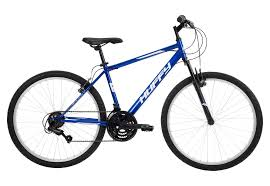

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [53]:
train=pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
#Reading the file.

## EDA

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
train.shape

(10886, 12)

In [9]:
test.shape

(6493, 9)

In [54]:
df=pd.concat([train,test])

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [12]:
df.shape

(17379, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
df.corr(numeric_only=True)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.096758,0.164011,0.163439
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.043799,-0.020956,-0.005393
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.319111,0.119460,0.011594
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.135918,-0.109340,-0.128655
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.467097,0.318571,0.394454
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.462067,0.314635,0.389784
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.348187,-0.265458,-0.317371
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


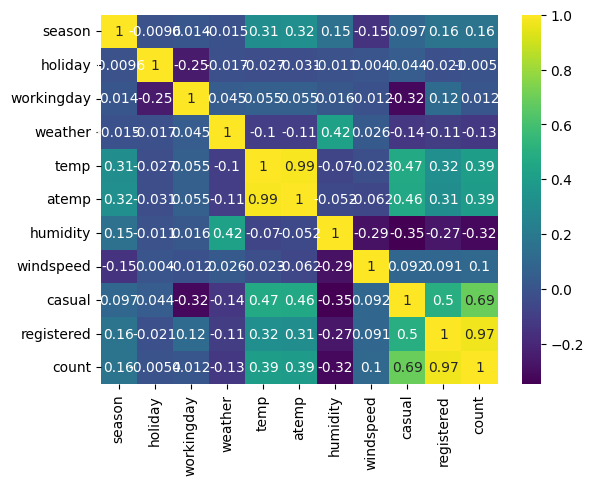

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis');

In [18]:
df.drop(['casual','registered','atemp'],axis=1, inplace=True)

In [19]:
df['datetime']=pd.to_datetime(df['datetime'])
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

In [20]:
df.drop('datetime',axis=1, inplace=True)

## Data Visualization

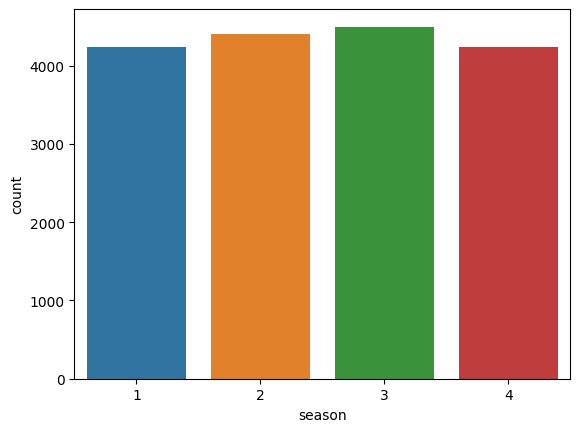

In [21]:
sns.countplot(x=df['season']);
# 1 = spring, 2 = summer, 3 = fall, 4 = winter 

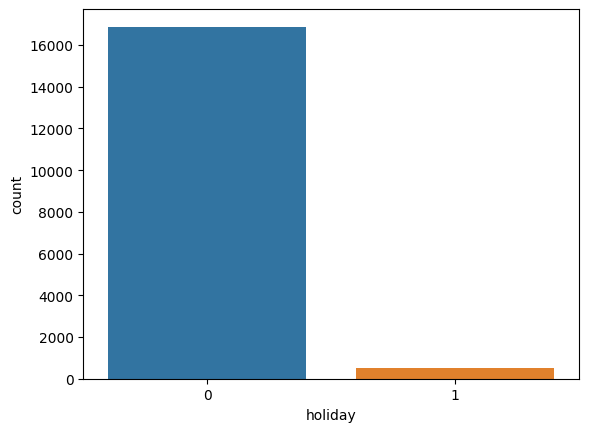

In [22]:
sns.countplot(x=df['holiday']);
#whether the day is considered a holiday

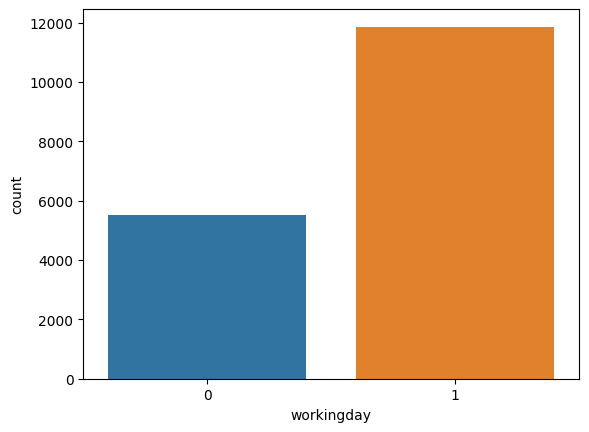

In [23]:
sns.countplot(x=df['workingday']);
# whether the day is neither a weekend nor holiday

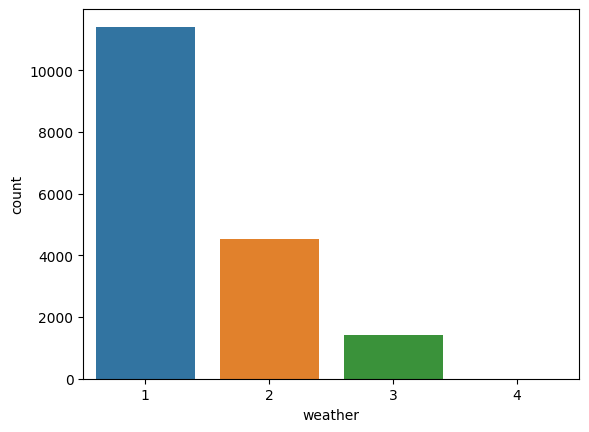

In [24]:
sns.countplot(x=df['weather']);
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

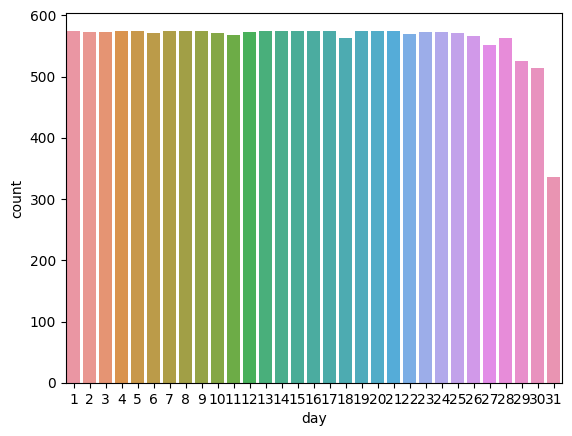

In [25]:
sns.countplot(x=df['day']);

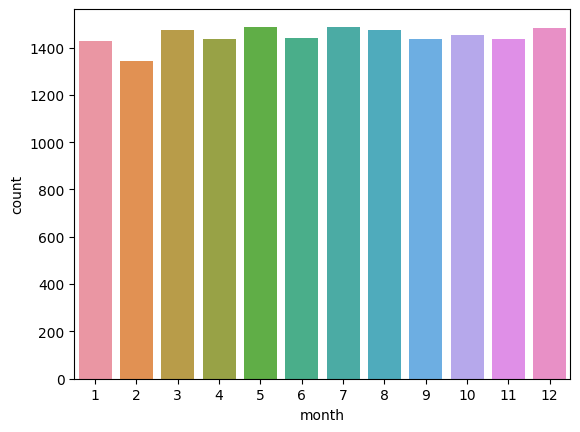

In [26]:
sns.countplot(x=df['month']);

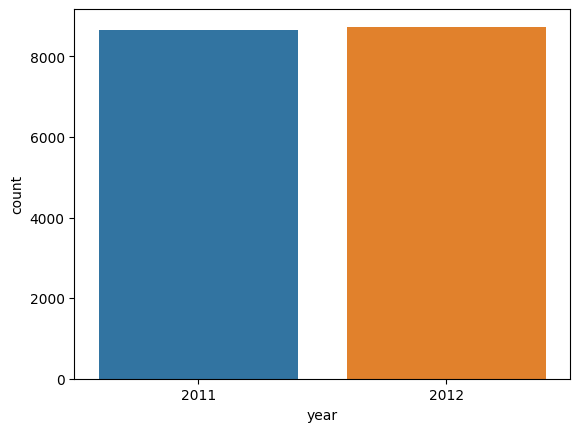

In [27]:
sns.countplot(x=df['year']);

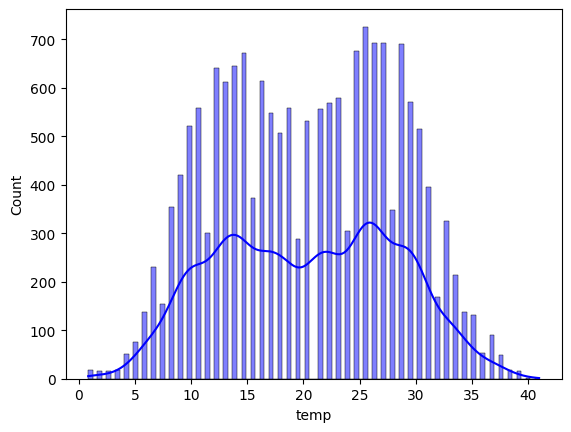

In [28]:
sns.histplot(x=df['temp'], kde=True,bins=100, color='blue');

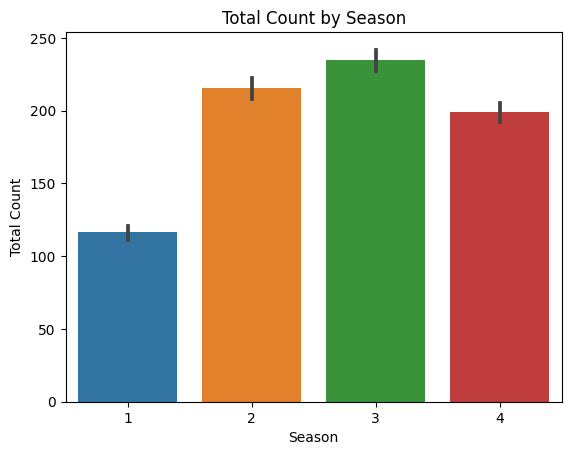

In [29]:
sns.barplot(x='season', y='count', data=df)
plt.title('Total Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Count');

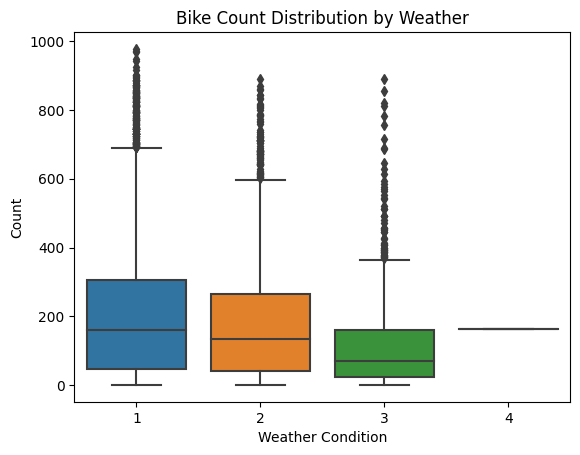

In [30]:
sns.boxplot(x='weather', y='count', data=df)
plt.title('Bike Count Distribution by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Count');

In [31]:
train.shape

(10886, 12)

## Modelling

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
train=df[:10886]
test=df[10886:]

In [34]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,day,month,year
0,1,0,0,1,9.84,81,0.0,16.0,1,1,2011
1,1,0,0,1,9.02,80,0.0,40.0,1,1,2011
2,1,0,0,1,9.02,80,0.0,32.0,1,1,2011
3,1,0,0,1,9.84,75,0.0,13.0,1,1,2011
4,1,0,0,1,9.84,75,0.0,1.0,1,1,2011


In [46]:
x=train.drop('count',axis=1)
y=train[['count']]

In [47]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
lr=LinearRegression()
model=lr.fit(x_train_scaled, y_train)
pred = lr.predict(x_test_scaled)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 149.36320354015055
R2 Score: 0.3241006477245221


In [43]:
xgb = XGBRegressor()
model=xgb.fit(x_train_scaled, y_train)
pred = xgb.predict(x_test_scaled)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 135.75762220579253
R2 Score: 0.44162850916151586


In [44]:
gbr = GradientBoostingRegressor()
model=gbr.fit(x_train_scaled, y_train)
pred = gbr.predict(x_test_scaled)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 138.11540603482544
R2 Score: 0.42206494228471236


## Test Data Predict

In [58]:
test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

In [49]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
x_test = test.drop('count', axis=1)

In [50]:
predictions=xgb.predict(x_test)

In [55]:
predictions1=pd.DataFrame()
predictions1['datetime']=test['datetime']

In [56]:
predictions1['count']=predictions

In [57]:
predictions1.to_csv('bike_submission.csv', index=False)

## Summary

The training and test data sets were read separately and combined into a format suitable for analysis. At this stage, the structure of both data sets was examined and their features were determined. Visualization of the data was done to understand the change in bicycle rental demand over time and its relationship with the weather. Using different graphs and maps, the rental habits of the users and the effects of weather conditions were analyzed. The combined data set was divided into training and test sets. Using the training data, a machine learning model was trained to predict bicycle rental demand.

The data was standardized to increase the performance of the model. The trained model made predictions on the test data set. The obtained predictions were saved in a CSV file containing bicycle rental demands. The project was completed with the successful training of the model and the accurate recording of the predictions. This study makes a significant contribution to the use of bicycle sharing systems and the understanding of urban mobility.

The project provides important information for examining urban mobility by predicting bicycle rental demands in Washington, D.C. The obtained results can be used for the management and optimization of bicycle sharing systems. The project has been completed  and aims to provide new skills to the participants.